# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 01: Herramientas Computacionales para Ciencia de Datos </center></h1>
    
## 1. Objetivos de la Actividad

Esta Actividad tiene como objetivo probar el ambiente de programación de cada estudiante, la instalación de librerías de Python. El segundo objetivo es aprender a usar GitHub, a configurar su repositorio, y entregar la actividad.

## 2. Módulos de Python

### 2.1 Importar módulos

Se recomienda comenzar con la importación de módulos o librerías de funciones para distintos usos, o partes de una libreria
Para facilitar la referencia a librerías en el resto del código, se acostumbra asignarles un alias. La sintaxis general a usar para importar un módulo es:

``import NOMBRE_MODULO as ALIAS_MODULO``
o
``from NOMBRE_MODULO import FUNCION``

In [2]:
#Importación de librerías: importe las siguientes librerías, usando alias comunes: numpy, pandas, geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 3. Ejercicio: Inspección de Datos del Censo 2017
El código a continuación permite descargar, leer, hacer algunos cálculos básicos y visualizar los datos de población del censo chileno de 2017 para la región metropolitana.
En este notebook, ud. sólo debe ejecutar las celdas de código a continuación, hasta generar una figura con la distribución de población total por manzana censal en la RM. Como demostración de la ejecución exitosa del código, debe subir este notebook y la figura final a su repositorio de Github.

In [3]:
#Leer archivo enun DataFrame
dat=pd.read_csv('Censo2017_Manzanas.csv',delimiter=';')

#Visualizar las primeras lineas
dat.head()

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,MZ_ENT,ID_ZONA_LOC,ID_MANZENT,PERSONAS,...,MATREC,MATIRREC,P05_1,P05_2,P05_3,P05_4,REGION_15R,PROVINCIA_15R,COMUNA_15R,ID_MANZENT_15R
0,1,11,1101,1,1,1,1,7849,1101011001001,15,...,0,0,0,0,0,0,1,11,1101,1101011001001
1,1,11,1101,1,1,1,10,7849,1101011001010,70,...,1,0,15,0,0,0,1,11,1101,1101011001010
2,1,11,1101,1,1,1,11,7849,1101011001011,36,...,5,0,15,0,0,0,1,11,1101,1101011001011
3,1,11,1101,1,1,1,12,7849,1101011001012,65,...,9,4,24,0,0,0,1,11,1101,1101011001012
4,1,11,1101,1,1,1,13,7849,1101011001013,39,...,0,0,9,0,0,0,1,11,1101,1101011001013


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180499 entries, 0 to 180498
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   REGION          180499 non-null  int64 
 1   PROVINCIA       180499 non-null  int64 
 2   COMUNA          180499 non-null  int64 
 3   DC              180499 non-null  int64 
 4   AREA            180499 non-null  int64 
 5   ZC_LOC          180499 non-null  int64 
 6   MZ_ENT          180499 non-null  int64 
 7   ID_ZONA_LOC     180499 non-null  int64 
 8   ID_MANZENT      180499 non-null  int64 
 9   PERSONAS        180499 non-null  int64 
 10  HOMBRES         180499 non-null  object
 11  MUJERES         180499 non-null  object
 12  EDAD_0A5        180499 non-null  object
 13  EDAD_6A14       180499 non-null  object
 14  EDAD_15A64      180499 non-null  object
 15  EDAD_65YMAS     180499 non-null  object
 16  INMIGRANTES     180499 non-null  object
 17  PUEBLO          180499 non-nu

### Pregunta: ¿Cuál era la población total de Chile en 2017?

Para responderla podemos hacer un cálculo sencillo y sumar todos los datos de la columna `PERSONAS`:

In [5]:
#Total de población
total_pop=dat['PERSONAS'].sum()
print(f'Población total en 2017: {total_pop}')

Población total en 2017: 17574003


También podemos usar algunas funciones más avanzadas de `pandas`para analizar la distribución de personas por región y edad:

In [6]:
#Distribución por edad y género
cols=['EDAD_0A5','EDAD_6A14','EDAD_15A64','EDAD_65YMAS']
for col in cols:
    dat[col]=dat[col].replace('*',0).astype(float)
    
pv=pd.pivot_table(dat, index='REGION', values=cols, aggfunc='sum', margins=False)
pv

,EDAD_0A5,EDAD_15A64,EDAD_65YMAS,EDAD_6A14
REGION,,,,
1,27089.0,225991.0,22784.0,42860.0
2,40763.0,427746.0,40299.0,70497.0
3,18862.0,188979.0,23711.0,33304.0
4,49130.0,498186.0,77212.0,83390.0
5,110371.0,1212273.0,222900.0,176235.0
6,58426.0,609723.0,96677.0,100364.0
7,62106.0,695161.0,111206.0,108436.0
8,98184.0,1049723.0,164977.0,166678.0
9,57165.0,629746.0,103612.0,99561.0


Y podemos graficar la cantidad por región:

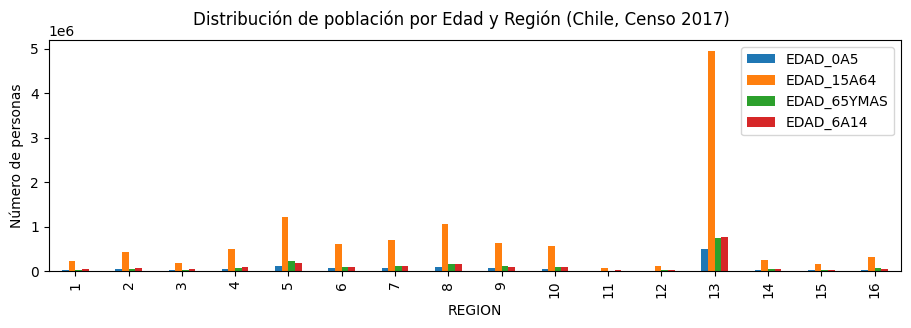

In [7]:
fig = plt.figure(figsize=(11,3))
ax = fig.add_subplot(111)
ax.set_ylabel('Número de personas')
fig.suptitle('Distribución de población por Edad y Región (Chile, Censo 2017)')
pv.plot(kind='bar', ax =ax);

## 4. Creación de un Mapa con información del Censo

A continuación usaremos librerías de geopandas para conectar un mapa de la Región Metropolitana con datos del Censo de 2017.

In [8]:
#Leer datos censales
manz=gpd.read_file('R13/MANZANA_IND_C17.shp')
com=gpd.read_file('R13/COMUNA_C17.shp')

Geopandas permite graficar archivos de mapas de múltiples formas. Para más información pueden revisar el siguiente enlace: https://geopandas.org/en/stable/docs/user_guide/mapping.html

<Axes: >

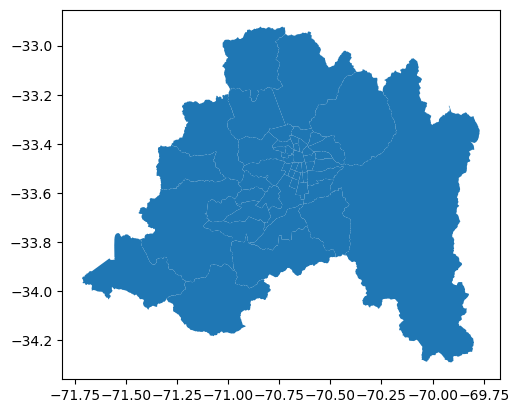

In [9]:
com.plot()

In [10]:
manz.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,DISTRITO,LOC_ZON,ENT_MAN,CATEGORIA,NOM_CATEGO,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,2,1,CD,13101071001002,764,287,0.005560,1.354544e-06,"POLYGON ((-70.67695 -33.42691, -70.67685 -33.4..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,8,1,2,1,CD,13101081001002,1307,509,0.006557,2.630421e-06,"POLYGON ((-70.67362 -33.42898, -70.67517 -33.4..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,3,1,CD,13101071001003,64,17,0.003859,5.979189e-07,"POLYGON ((-70.67812 -33.42803, -70.67813 -33.4..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,4,1,CD,13101071001004,52,21,0.004683,1.265246e-06,"POLYGON ((-70.68043 -33.42897, -70.68046 -33.4..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,8,1,CD,13101071001008,67,14,0.003491,7.452444e-07,"POLYGON ((-70.67805 -33.42921, -70.67858 -33.4..."


El siguiente código conecta el mapa de la Región Metropolitana con la población por manzana del Censo 2017. Edite el código para que la figura tenga su nombre en el Titulo

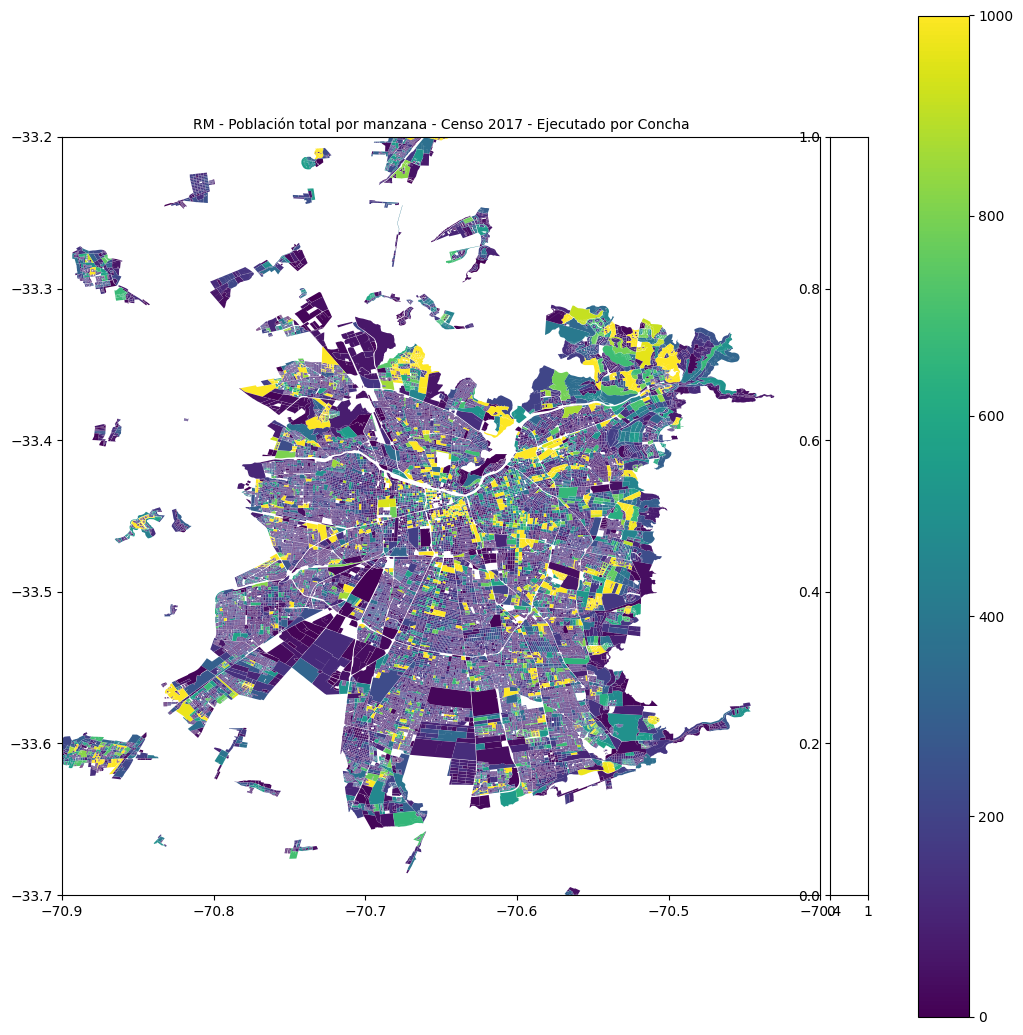

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

#Crear figura y ejes
fig=plt.figure(figsize=(13,13))
ax=fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# cantidad de personas por manzana
Z=manz['TOTAL_PERS']
manz.plot(ax=ax, column='TOTAL_PERS', cmap='viridis', legend=True, vmin=0, vmax=1000)

com_projected = com.to_crs(epsg=3857)
com_projected.boundary.plot(ax=ax, lw=0.2, color='k')

xlim=[-70.9,-70.4]
ylim=[-33.7,-33.2]
for x, y, label in zip(com_projected.geometry.centroid.x, com_projected.geometry.centroid.y, com_projected.NOM_COMUNA):
    if xlim[0]<x<xlim[1] and ylim[0]<y<ylim[1]:
        ax.text(x, y, label, fontsize = 10)
        
ax.set_xlim(xlim)
ax.set_ylim(ylim)

## Reemplace 'XXX' por su apellido
ax.set_title('RM - Población total por manzana - Censo 2017 - Ejecutado por Concha',fontsize=10)

## Reemplace 'XXX' por su apellido en el nombre del archivo de salida 
fig.savefig('PoblacionRM_C2017_Concha.jpg')

## 5. Cierre de la Actividad 01: Repositorio presonal

Para terminar la Actividad 01, deben hacer los siguientes pasos:
- Crear un repositorio en su cuenta personal con el nombre ``IMT2200-<NOMBRE>-<APELLIDO>`` y clonar en su computador.
- Crear una carpeta adentro llamada "Actividad 01" y copiar adentro el contenido de la carpeta "Actividad 01" del repositorio del curso.
- Actualizar el repositorio agregando el Notebook de Jupyter y la imagen con el Mapa con su nombre.
- Editar el archivo ``README.md`` para describir su repositorio.
- Entregar en el módulo ``Actividad 1`` en Canvas la URL de su repositorio para corrección.